In [ ]:
!pip install feature_engine==0.6

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.variable_transformers import LogTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from feature_engine.variable_transformers import ReciprocalTransformer
from feature_engine.variable_transformers import PowerTransformer

# Logarithmic Transformations

In [2]:
# load the the Boston House price data from Scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book recipe)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


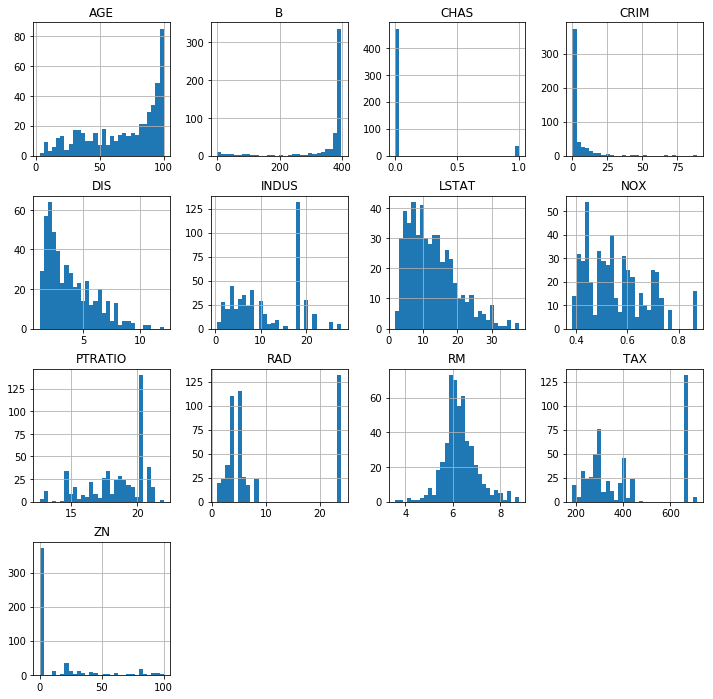

In [3]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [4]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

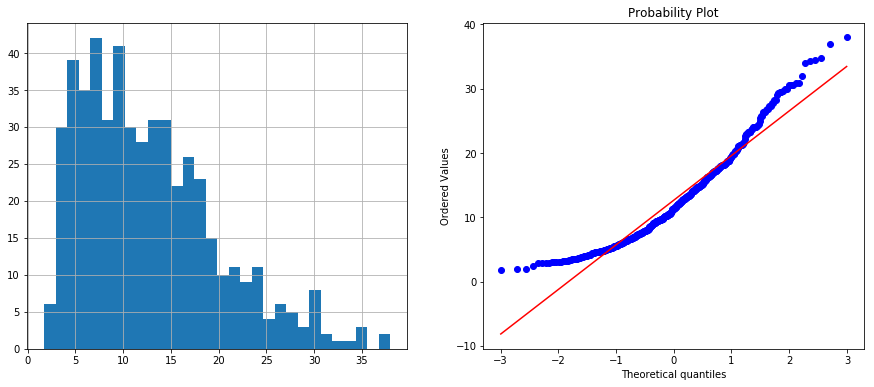

In [5]:
# check original distribution

diagnostic_plots(data, 'LSTAT')

## Logarithmic transformation with NumPy

In [6]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [7]:
# apply log to a set of variables
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(
    data[['LSTAT', 'NOX', 'DIS', 'RM']])

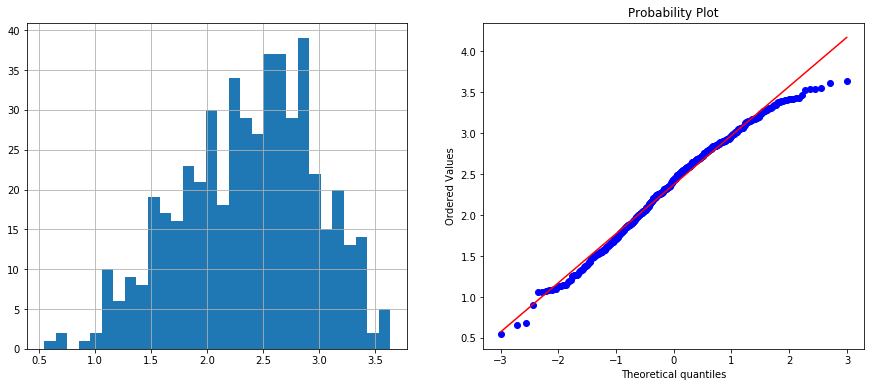

In [8]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'LSTAT')

## Logarithmic transformation with Scikit-learn

In [9]:
# start the transformer with NumPy log as argument
transformer = FunctionTransformer(np.log, validate=True)

In [10]:
# make a list of columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform subset of dataframe
data_tf = transformer.transform(data[cols])

In [11]:
# capture returned NumPy array in pandas dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

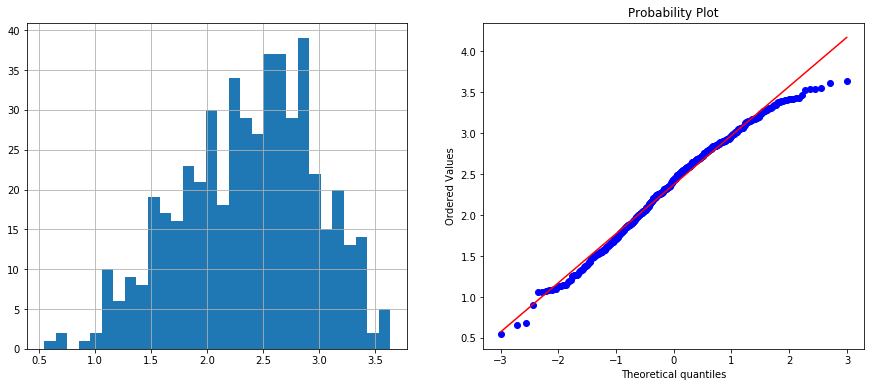

In [12]:
# use diagnostic plot function to evaluate transformation
# (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Logarithmic transformation with Feature-engine

In [13]:
# initialize the transformer
lt = LogTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to data set
lt.fit(data)

LogTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [14]:
# transform variables within our data set
data_tf = lt.transform(data)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


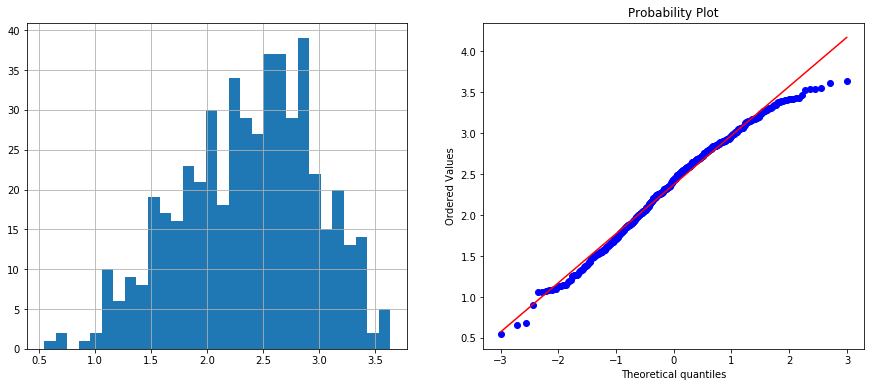

In [15]:
# use diagnostic plot function to evaluate transformation
# (not in book)

diagnostic_plots(data_tf, 'LSTAT')

## Logarithm with Scikit-learn selecting a group of variables

### Not in book

In [17]:
# load data set
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

In [18]:
# list of variables to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# set transformer within a pipeline
log_transformer = Pipeline(steps=[('log_transformer',
                                   FunctionTransformer(np.log, validate=True))])

# set pipeline within ColumnTransformer to select features
preprocessor = ColumnTransformer(transformers=[
    ('log_transformer', log_transformer, cols)], remainder='passthrough')

In [19]:
# fit to the data (the entire dataframe this time)
preprocessor.fit(data)

# transform the data
data_tf = preprocessor.transform(data)

In [20]:
# visualize the data as a pandas dataframe
pd.DataFrame(data_tf)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.605430,-0.619897,1.408545,1.883275,0.00632,18.0,2.31,0.0,65.2,1.0,296.0,15.3,396.90
1,2.212660,-0.757153,1.602836,1.859574,0.02731,0.0,7.07,0.0,78.9,2.0,242.0,17.8,396.90
2,1.393766,-0.757153,1.602836,1.971996,0.02729,0.0,7.07,0.0,61.1,2.0,242.0,17.8,392.83
3,1.078410,-0.780886,1.802073,1.945624,0.03237,0.0,2.18,0.0,45.8,3.0,222.0,18.7,394.63
4,1.673351,-0.780886,1.802073,1.966693,0.06905,0.0,2.18,0.0,54.2,3.0,222.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2.269028,-0.556870,0.907694,1.886008,0.06263,0.0,11.93,0.0,69.1,1.0,273.0,21.0,391.99
502,2.206074,-0.556870,0.827460,1.811562,0.04527,0.0,11.93,0.0,76.7,1.0,273.0,21.0,396.90
503,1.729884,-0.556870,0.773574,1.942476,0.06076,0.0,11.93,0.0,91.0,1.0,273.0,21.0,396.90
504,1.868721,-0.556870,0.870833,1.916040,0.10959,0.0,11.93,0.0,89.3,1.0,273.0,21.0,393.45


# Reciprocal Transformation

In [2]:
# load the the Boston House price data from scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book recipe)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


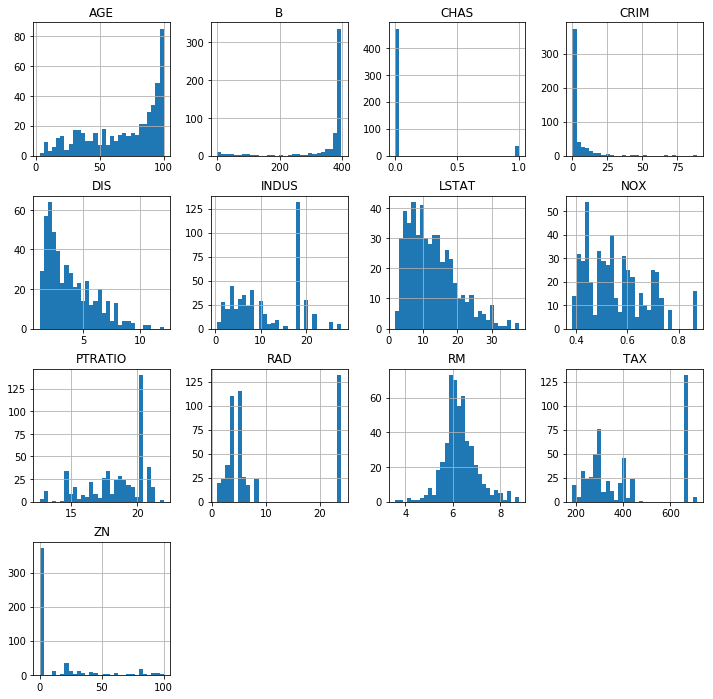

In [3]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [4]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

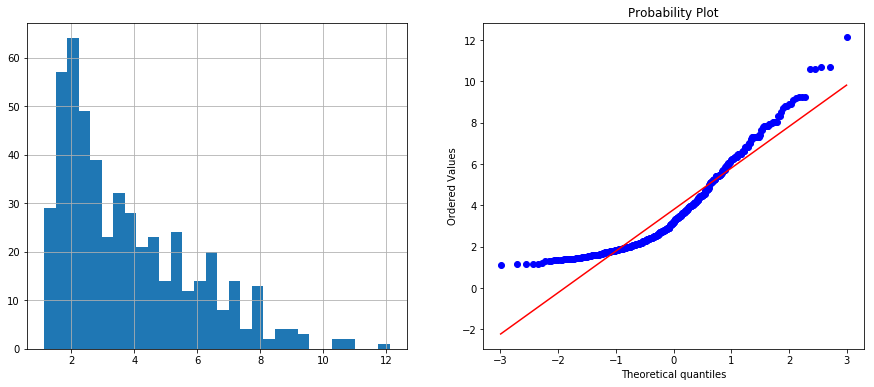

In [5]:
# check original distribution of the variable DIS

diagnostic_plots(data, 'DIS')

## Reciprocal transformation with NumPy

In [6]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [7]:
# apply the reciprocal to a set of variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.reciprocal(data[['LSTAT', 'NOX', 'DIS', 'RM']])

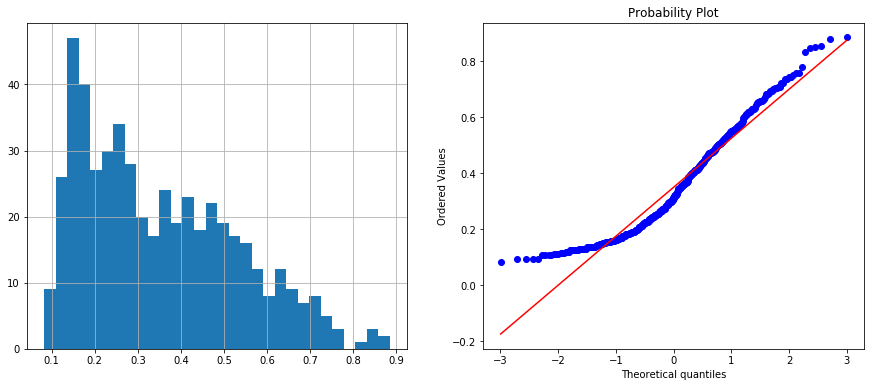

In [8]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'DIS')

## Reciprocal transformation with Scikit-learn

In [9]:
# start the transformer with NumPy reciprocal as argument

transformer = FunctionTransformer(np.reciprocal, validate=True)

In [10]:
# make a list of columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform subset of dataframe
data_tf = transformer.transform(data[cols])

In [11]:
# capture returned NumPy array in pandas dataframe

data_tf = pd.DataFrame(data_tf, columns=cols)

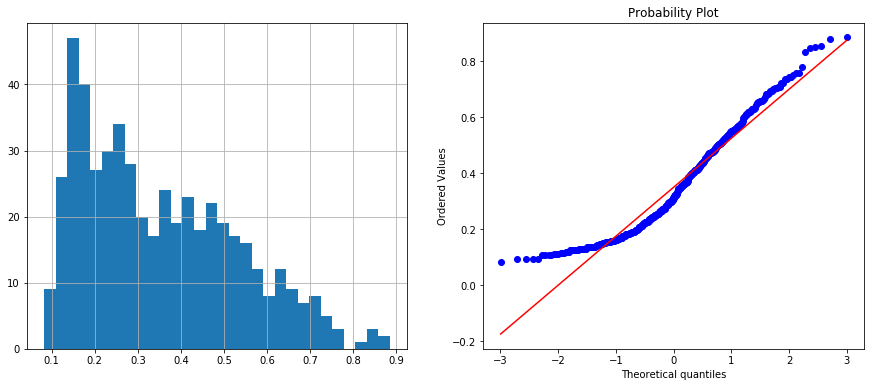

In [12]:
# use diagnostic plot function to evaluate transformation
# (not in book)

diagnostic_plots(data_tf, 'DIS')

## Reciprocal transformation with Feature-engine

In [13]:
# initialize the transformer
rt = ReciprocalTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to the entire dataframe
rt.fit(data)

ReciprocalTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [14]:
# transform the indicated variables within our data set
data_tf = rt.transform(data)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


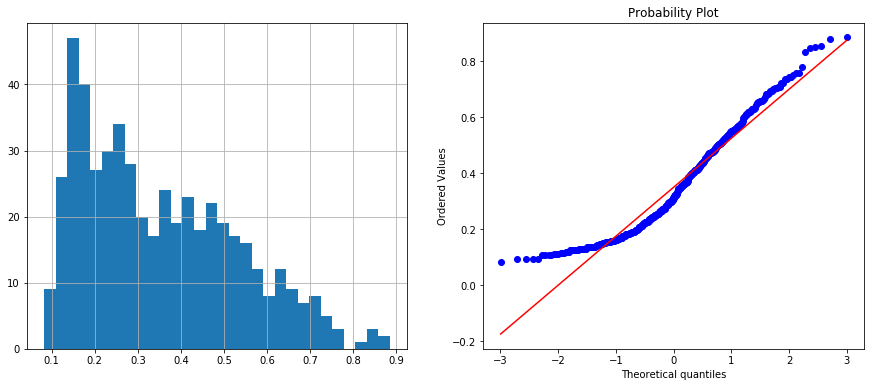

In [15]:
# use diagnostic plot function to evaluate transformation
# (not in book)

diagnostic_plots(data_tf, 'DIS')

# Sqaure Cube Root Transformation

In [2]:
# load the the Boston House price data from Scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book recipe)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


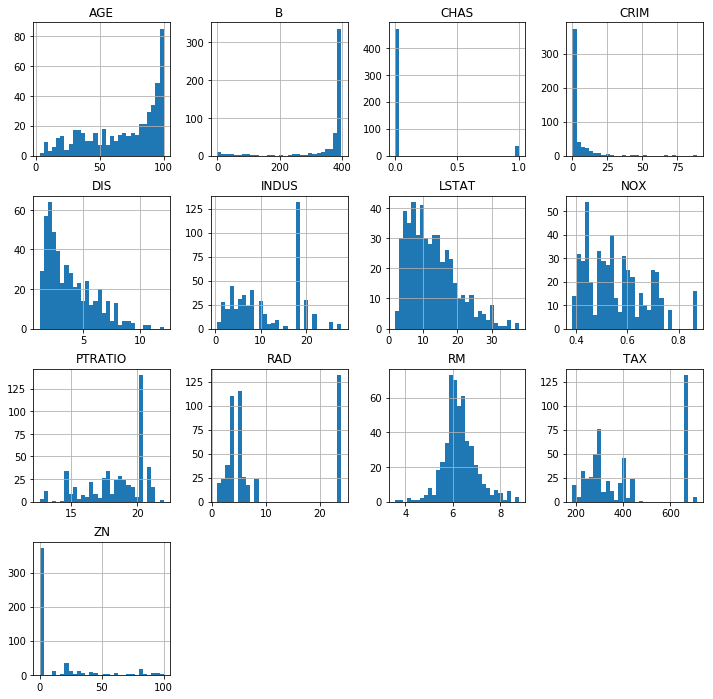

In [3]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [4]:
# plot histogram and Q-Q plots to have a look at the variable distribution
# (not in this recipe in book)

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

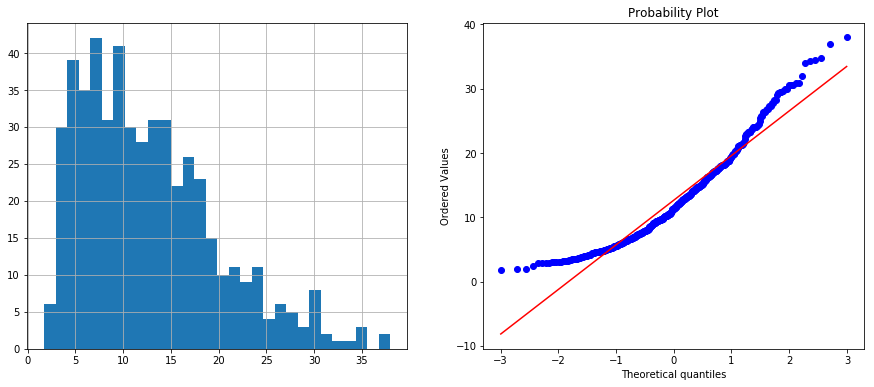

In [5]:
# check original distribution (not in book recipe)

diagnostic_plots(data, 'LSTAT')

## Square / Cube root transformation with NumPy

In [6]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [7]:
# apply the square root transformation to a set of variables
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.sqrt(data[['LSTAT', 'NOX', 'DIS', 'RM']])

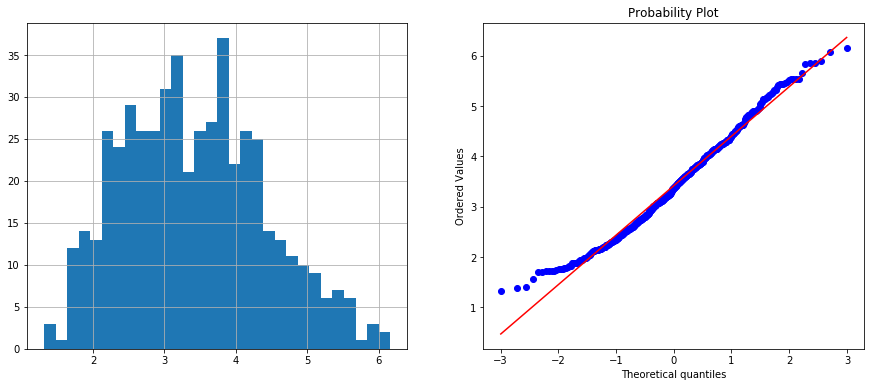

In [8]:
# plot to visualize the transformation (not in book)

diagnostic_plots(data_tf, 'LSTAT')

In [9]:
# apply the cube root transformation to a set of variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.cbrt(data[['LSTAT', 'NOX', 'DIS', 'RM']])

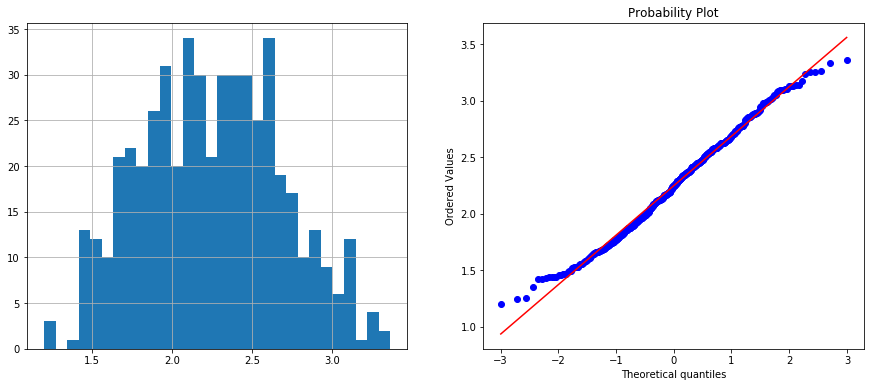

In [10]:
# plot to visualize the transformation (not in book)

diagnostic_plots(data_tf, 'LSTAT')

## Square / Cube root transformation with Scikit-learn

In [11]:
# start the transformer with NumPy sqrt as argument

transformer = FunctionTransformer(np.sqrt, validate=True)

In [12]:
# make a list of variables to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform slice of dataframe with indicated variables
# returns NumPy array
data_tf = transformer.transform(data[cols])

In [13]:
# capture NumPy array into dataframe (not in book) 
data_tf = pd.DataFrame(data_tf, columns=cols)

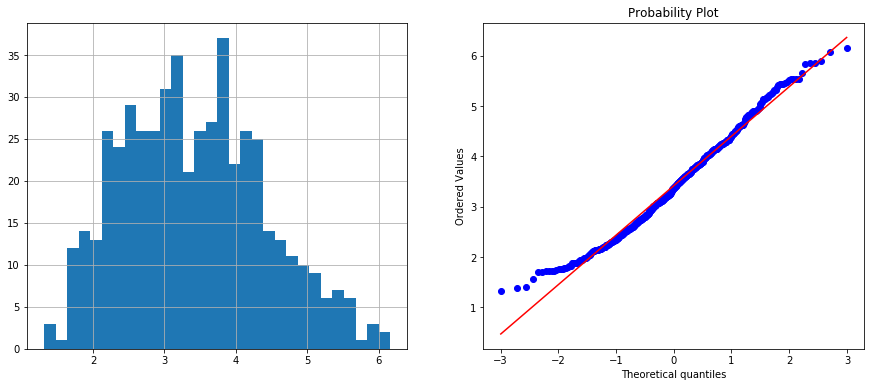

In [14]:
#make plot to visualize transformation (not included in book)
diagnostic_plots(data_tf, 'LSTAT')

## There is more...

### Only summarized in book, code not present

Apply Square and cube root with Feature-engine

In [16]:
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(data)

PowerTransformer(exp=0.3333333333333333,
                 variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [17]:
# transform indicated variables within our dataframe
data_tf = et.transform(data)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


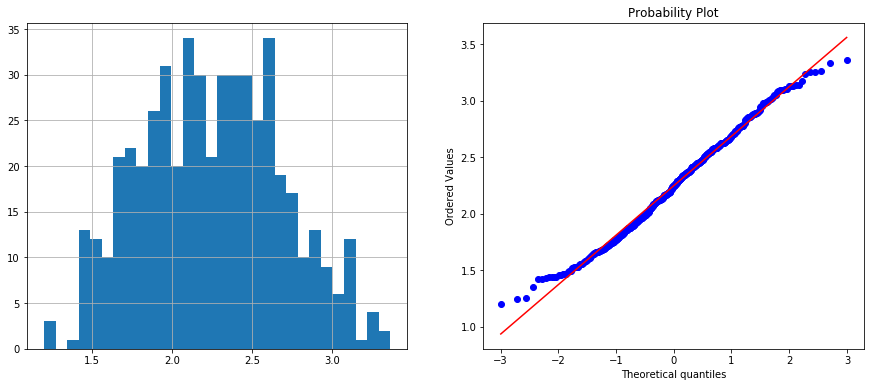

In [18]:
# visualize the trasnformation

diagnostic_plots(data_tf, 'LSTAT')

# Power Trasformation

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.variable_transformers import PowerTransformer

In [2]:
# load the the Boston House price data from scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# print top 5 rows (not in book)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


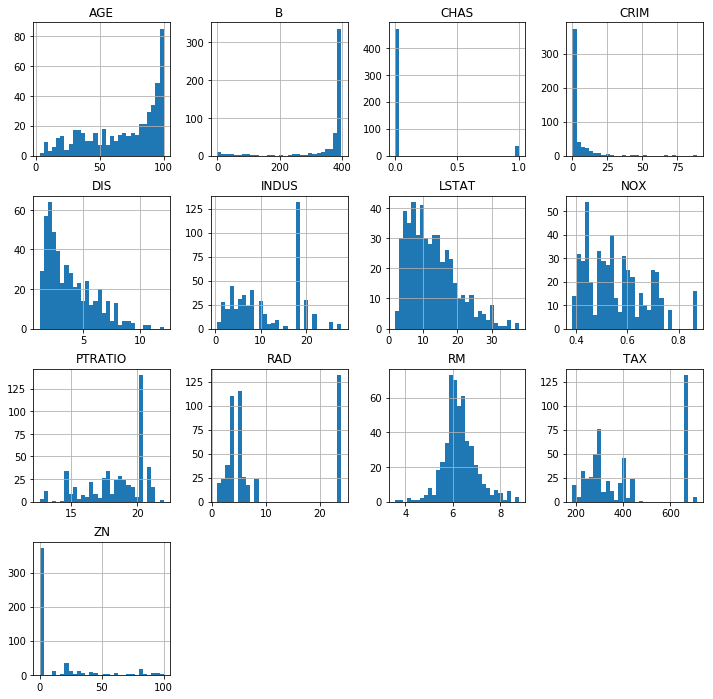

In [3]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [4]:
# plot histogram and Q-Q plots to have a look at the variable distribution
# (not in this recipe of the book)

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

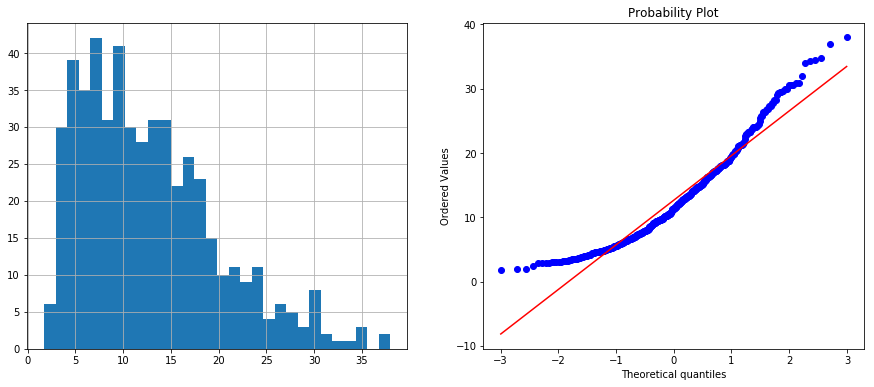

In [5]:
# check original distribution (not included in this recipe of book)

diagnostic_plots(data, 'LSTAT')

## Exponential transformation with NumPy

In [6]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [7]:
# apply a 0.3 exponent power transformation to a set of variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.power(data[['LSTAT', 'NOX', 'DIS', 'RM']], 0.3)

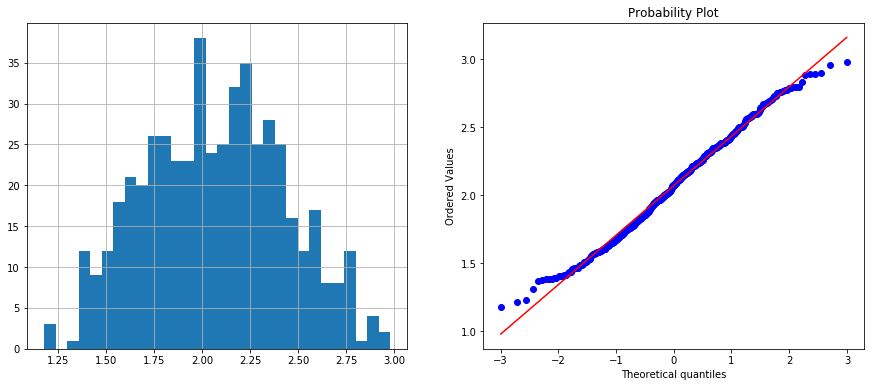

In [8]:
# visuallize the transformation (not included in recipe)

diagnostic_plots(data_tf, 'LSTAT')

## Exponential transformation with Scikit-learn

In [9]:
# initialize the transformer with a user defined function, in this
# case the 0.3 power transformation

transformer = FunctionTransformer(lambda x: np.power(x, 0.3), validate=True)

In [10]:
# capture variables to transform in a list
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform slice of dataframe with indicated variables
data_tf = transformer.transform(data[cols])

In [11]:
# capture returned NumPy array into a dataframe

data_tf = pd.DataFrame(data_tf, columns=cols)

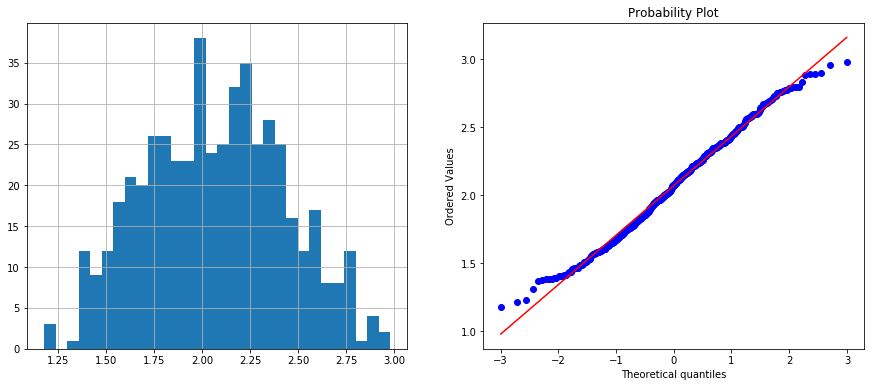

In [12]:
# visualize the transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Exponential transformation with Feature-engine

In [13]:
# initialize the transformer with the variables to transform and 
# the desired exponent

et = PowerTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'], exp=0.3)

# fit transformer to data
et.fit(data)

PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [14]:
# transform indicated variables in the dataset
data_tf = et.transform(data)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


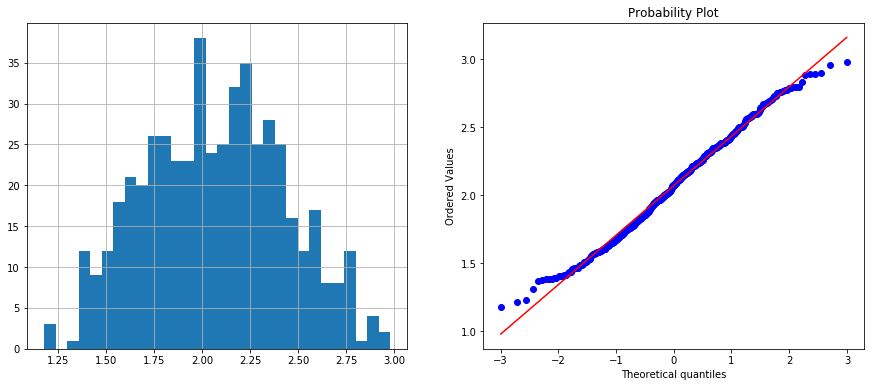

In [15]:
# plot transform variable
diagnostic_plots(data_tf, 'LSTAT')

## There is more
### Not included in the book

Apply different power transformations to different set of features using Feature-engine

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
pipe = Pipeline([
    ('power1', PowerTransformer(variables = ['LSTAT', 'NOX'], exp=0.3)),    
    ('power2', PowerTransformer(variables = ['DIS'], exp=0.4)),
    ('power3', PowerTransformer(variables = ['RM'], exp=0.5)),
     ])

In [18]:
pipe.fit(data)

Pipeline(memory=None,
         steps=[('power1',
                 PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX'])),
                ('power2', PowerTransformer(exp=0.4, variables=['DIS'])),
                ('power3', PowerTransformer(exp=0.5, variables=['RM']))],
         verbose=False)

In [19]:
data_tf = pipe.transform(data)